In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, minmax_scale

### Observe the range of values for all numeric columns

In [4]:
real_estate_data = pd.read_csv("datasets/real_estate_data_processed.csv")

real_estate_data.describe()

,house_age,Distance_to_MRT_Station,no_of_convenient_stores,house_price
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


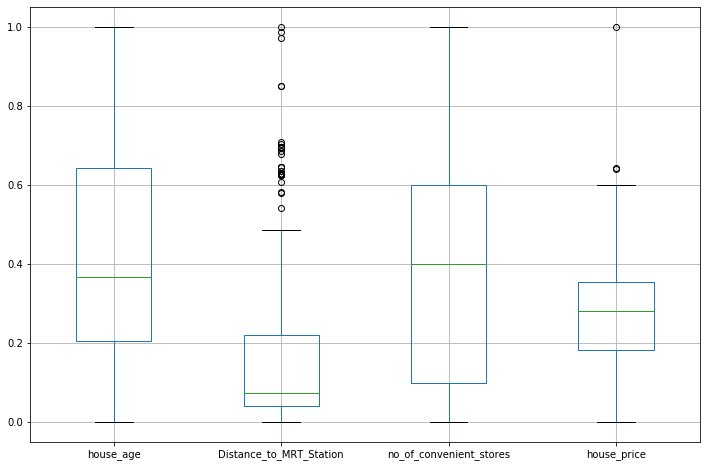

In [6]:
scaled_df = pd.DataFrame(minmax_scale(real_estate_data), 
                         columns = real_estate_data.columns)

scaled_df.boxplot(figsize = (12, 8))

plt.show()

### All values will now be range scaled to lie between 1, 10

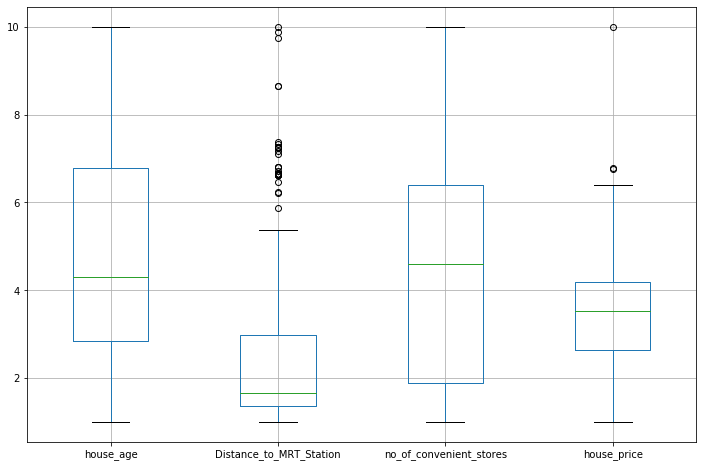

In [7]:
scaled_df = pd.DataFrame(minmax_scale(real_estate_data,
                                      feature_range = (1, 10)),
                         columns = real_estate_data.columns)

scaled_df.boxplot(figsize = (12, 8))

plt.show()

### All values will now be range scaled to lie between 1, 100

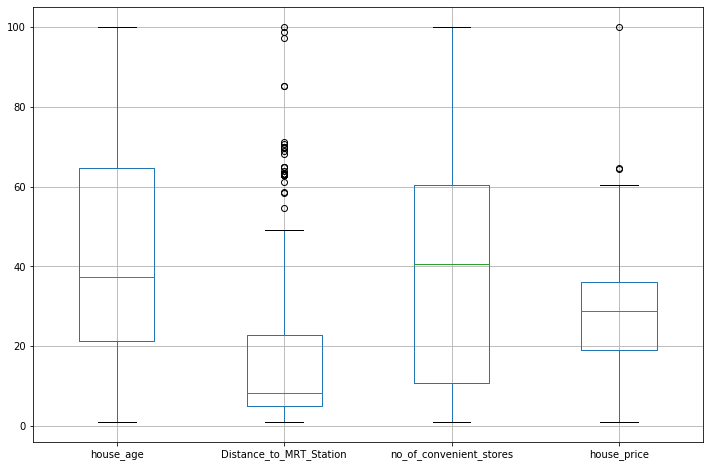

In [8]:
scaled_df = pd.DataFrame(minmax_scale(real_estate_data,
                                      feature_range = (1, 100)),
                         columns = real_estate_data.columns)

scaled_df.boxplot(figsize = (12, 8))

plt.show()

### All values will now be range scaled to lie between 20, 30

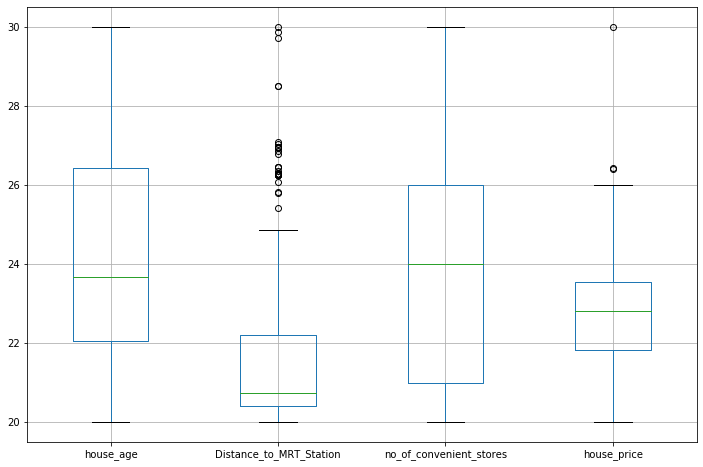

In [9]:
scaled_df = pd.DataFrame(minmax_scale(real_estate_data,
                                      feature_range = (20, 30)),
                         columns = real_estate_data.columns)

scaled_df.boxplot(figsize = (12, 8))

plt.show()

In [10]:
house_age_df = pd.DataFrame(real_estate_data["house_age"], columns = ["house_age"])

house_age_df.head()

,house_age
0,32.0
1,19.5
2,13.3
3,13.3
4,5.0


In [11]:
house_age_df["scaled"] = scale(house_age_df)

house_age_df.head()

,house_age,scaled
0,32.0,1.255628
1,19.5,0.157086
2,13.3,-0.387791
3,13.3,-0.387791
4,5.0,-1.117223


In [12]:
range_max = 100
range_min = 0

house_age_max = house_age_df["house_age"].max()
house_age_min = house_age_df["house_age"].min()

### Range scaling

- rangemin + ((x - xmin) / (xmax - xmin)) * (rangemax - rangemin)

In [13]:
house_age_df['range_scaled'] = ((house_age_df['house_age'] - house_age_min) / \
                                (house_age_max - house_age_min)) *  \
                                (range_max - range_min) +  \
                                range_min

house_age_df.head()

,house_age,scaled,range_scaled
0,32.0,1.255628,73.059361
1,19.5,0.157086,44.520548
2,13.3,-0.387791,30.365297
3,13.3,-0.387791,30.365297
4,5.0,-1.117223,11.415525


In [14]:
house_age_df["minmax_scaled"] = minmax_scale(real_estate_data["house_age"],
                                             feature_range = (0, 100))

house_age_df.head()

,house_age,scaled,range_scaled,minmax_scaled
0,32.0,1.255628,73.059361,73.059361
1,19.5,0.157086,44.520548,44.520548
2,13.3,-0.387791,30.365297,30.365297
3,13.3,-0.387791,30.365297,30.365297
4,5.0,-1.117223,11.415525,11.415525


In [17]:
minmax_scaler = MinMaxScaler(feature_range = (0, 100))

house_age_df["minmax_estimator_scaled"] = \
    minmax_scaler.fit_transform(house_age_df["house_age"].values.reshape(-1,1))
                                             
house_age_df.head()

,house_age,scaled,range_scaled,minmax_scaled,minmax_estimator_scaled
0,32.0,1.255628,73.059361,73.059361,73.059361
1,19.5,0.157086,44.520548,44.520548,44.520548
2,13.3,-0.387791,30.365297,30.365297,30.365297
3,13.3,-0.387791,30.365297,30.365297,30.365297
4,5.0,-1.117223,11.415525,11.415525,11.415525
